### K-Means

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
import numpy as np

In [18]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [19]:
X,y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

In [20]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

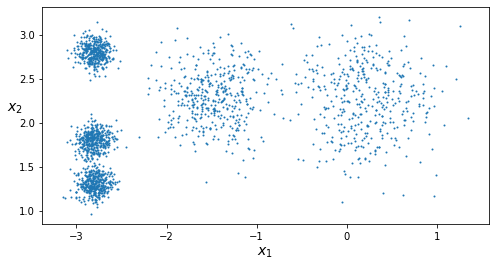

In [21]:
plt.figure(figsize=(8,4))
plot_clusters(X)
plt.show()

In [22]:
from sklearn.cluster import KMeans

In [23]:
k = 5 

In [24]:
k_means = KMeans(n_clusters=k, random_state=42)

In [25]:
y_pred = k_means.fit_predict(X)

In [26]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [27]:
k_means.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [28]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
k_means.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

In the KMeans class, the transform() method measures the distance from each instance to every centroid

In [29]:
k_means.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [30]:
k_means.inertia_

211.5985372581684

### Image Segmentation

In [37]:
from matplotlib.image import imread
import os

In [38]:
image = imread(os.path.join("images", "flowers.jpg"))

In [39]:
image.shape

(2213, 3000, 3)

In [40]:
X = image.reshape(-1, 3)

In [41]:
X.shape

(6639000, 3)

In [42]:
kmeans = KMeans(n_clusters=8).fit(X)

In [43]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

In [44]:
segmented_img = segmented_img.reshape(image.shape)

In [45]:
segmented_img.shape

(2213, 3000, 3)

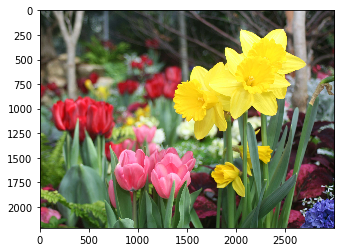

In [46]:
plt.imshow(image)

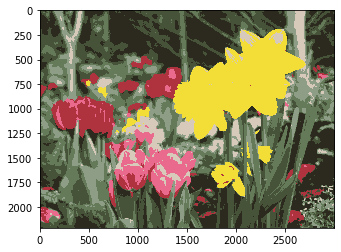

In [47]:
plt.imshow(segmented_img.astype('uint8'))

### Clustering for Preprocessing 

In [48]:
from sklearn.datasets import load_digits

In [49]:
X,y = load_digits(return_X_y=True)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

In [54]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
log_reg.score(X_test, y_test)

0.9711111111111111

Use Clusering as perprocessing for logistic regression

In [70]:
from sklearn.pipeline import Pipeline

In [71]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [72]:
pipeline.score(X_test, y_test)

0.9777777777777777

Grid Search for number of clusters

In [73]:
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = dict(kmeans__n_clusters = range(2,50))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 198 candidates, totalling 594 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.1s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.1s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.1s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.1s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[CV] ............................ kmeans__n_clusters=21, total=   2.0s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.0s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.1s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.2s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   2.1s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   2.4s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   2.4s
[CV] kmeans__n_clusters=24 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=41, total=   3.0s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   2.9s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   2.7s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   3.0s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   2.8s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   2.7s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   2.9s
[CV] kmeans__n_clusters=43 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=60, total=   2.8s
[CV] kmeans__n_clusters=60 ...........................................
[CV] ............................ kmeans__n_clusters=60, total=   2.7s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   2.7s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   3.0s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   2.9s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   2.8s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   3.1s
[CV] kmeans__n_clusters=62 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=79, total=   3.1s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   3.2s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   3.5s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   3.2s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   3.2s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   3.5s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   3.4s
[CV] kmeans__n_clusters=82 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=99, total=   3.7s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   3.3s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   3.9s
[CV] kmeans__n_clusters=100 ..........................................
[CV] ........................... kmeans__n_clusters=100, total=   3.7s
[CV] kmeans__n_clusters=100 ..........................................
[CV] ........................... kmeans__n_clusters=100, total=   3.1s
[CV] kmeans__n_clusters=100 ..........................................
[CV] ........................... kmeans__n_clusters=100, total=   3.1s
[CV] kmeans__n_clusters=101 ..........................................
[CV] ........................... kmeans__n_clusters=101, total=   3.4s
[CV] kmeans__n_clusters=101 ..........................................
[CV] .

[CV] ........................... kmeans__n_clusters=118, total=   3.2s
[CV] kmeans__n_clusters=118 ..........................................
[CV] ........................... kmeans__n_clusters=118, total=   3.8s
[CV] kmeans__n_clusters=119 ..........................................
[CV] ........................... kmeans__n_clusters=119, total=   3.3s
[CV] kmeans__n_clusters=119 ..........................................
[CV] ........................... kmeans__n_clusters=119, total=   3.0s
[CV] kmeans__n_clusters=119 ..........................................
[CV] ........................... kmeans__n_clusters=119, total=   3.4s
[CV] kmeans__n_clusters=120 ..........................................
[CV] ........................... kmeans__n_clusters=120, total=   3.2s
[CV] kmeans__n_clusters=120 ..........................................
[CV] ........................... kmeans__n_clusters=120, total=   3.3s
[CV] kmeans__n_clusters=120 ..........................................
[CV] .

[CV] ........................... kmeans__n_clusters=137, total=   2.9s
[CV] kmeans__n_clusters=138 ..........................................
[CV] ........................... kmeans__n_clusters=138, total=   3.4s
[CV] kmeans__n_clusters=138 ..........................................
[CV] ........................... kmeans__n_clusters=138, total=   3.0s
[CV] kmeans__n_clusters=138 ..........................................
[CV] ........................... kmeans__n_clusters=138, total=   3.4s
[CV] kmeans__n_clusters=139 ..........................................
[CV] ........................... kmeans__n_clusters=139, total=   3.7s
[CV] kmeans__n_clusters=139 ..........................................
[CV] ........................... kmeans__n_clusters=139, total=   3.7s
[CV] kmeans__n_clusters=139 ..........................................
[CV] ........................... kmeans__n_clusters=139, total=   3.4s
[CV] kmeans__n_clusters=140 ..........................................
[CV] .

[CV] ........................... kmeans__n_clusters=157, total=   3.3s
[CV] kmeans__n_clusters=157 ..........................................
[CV] ........................... kmeans__n_clusters=157, total=   3.4s
[CV] kmeans__n_clusters=157 ..........................................
[CV] ........................... kmeans__n_clusters=157, total=   3.4s
[CV] kmeans__n_clusters=158 ..........................................
[CV] ........................... kmeans__n_clusters=158, total=   3.3s
[CV] kmeans__n_clusters=158 ..........................................
[CV] ........................... kmeans__n_clusters=158, total=   3.4s
[CV] kmeans__n_clusters=158 ..........................................
[CV] ........................... kmeans__n_clusters=158, total=   3.4s
[CV] kmeans__n_clusters=159 ..........................................
[CV] ........................... kmeans__n_clusters=159, total=   3.6s
[CV] kmeans__n_clusters=159 ..........................................
[CV] .

[CV] ........................... kmeans__n_clusters=176, total=   3.3s
[CV] kmeans__n_clusters=176 ..........................................
[CV] ........................... kmeans__n_clusters=176, total=   3.0s
[CV] kmeans__n_clusters=177 ..........................................
[CV] ........................... kmeans__n_clusters=177, total=   4.1s
[CV] kmeans__n_clusters=177 ..........................................
[CV] ........................... kmeans__n_clusters=177, total=   3.4s
[CV] kmeans__n_clusters=177 ..........................................
[CV] ........................... kmeans__n_clusters=177, total=   2.9s
[CV] kmeans__n_clusters=178 ..........................................
[CV] ........................... kmeans__n_clusters=178, total=   3.9s
[CV] kmeans__n_clusters=178 ..........................................
[CV] ........................... kmeans__n_clusters=178, total=   3.4s
[CV] kmeans__n_clusters=178 ..........................................
[CV] .

[CV] ........................... kmeans__n_clusters=195, total=   2.9s
[CV] kmeans__n_clusters=196 ..........................................
[CV] ........................... kmeans__n_clusters=196, total=   3.8s
[CV] kmeans__n_clusters=196 ..........................................
[CV] ........................... kmeans__n_clusters=196, total=   3.3s
[CV] kmeans__n_clusters=196 ..........................................
[CV] ........................... kmeans__n_clusters=196, total=   2.9s
[CV] kmeans__n_clusters=197 ..........................................
[CV] ........................... kmeans__n_clusters=197, total=   3.5s
[CV] kmeans__n_clusters=197 ..........................................
[CV] ........................... kmeans__n_clusters=197, total=   3.4s
[CV] kmeans__n_clusters=197 ..........................................
[CV] ........................... kmeans__n_clusters=197, total=   3.3s
[CV] kmeans__n_clusters=198 ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done 594 out of 594 | elapsed: 29.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                      

In [80]:
grid_clf.score(X_test, y_test)

0.9777777777777777

In [81]:
grid_clf.best_params_

{'kmeans__n_clusters': 168}

### Semi-supervised learning

In [74]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

/Users/sidparmar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.86

In [75]:
k = 50

In [76]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

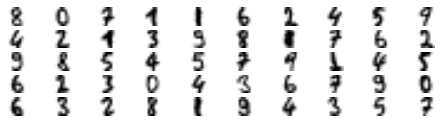

In [77]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [93]:
y_representative_digits = np.array([
    8, 0, 7, 1, 1, 6, 2, 4, 5, 9,
    4, 2, 1, 3, 9, 8, 8, 7, 6, 2,
    9, 8, 5, 4, 5, 7, 9, 1, 4, 5,
    6, 2, 3, 0, 4, 3, 6, 7, 9, 0,
    6, 3, 2, 8, 1, 9, 4, 3, 5, 7])

In [94]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9133333333333333

label propagation

In [105]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)

for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [106]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9311111111111111

In [111]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [112]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [114]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
log_reg.score(X_test, y_test)

0.8955555555555555

^ score should be higher than last score. It should be around 94%

In [116]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9686411149825784

### DBSCAN

In [1]:
from sklearn.cluster import DBSCAN

In [2]:
from sklearn.datasets import make_moons

In [3]:
X,y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [4]:
dbscan.labels_

array([ 0,  1,  2,  3, -1,  0,  4,  0,  4,  4,  4,  1,  0,  6,  5,  4,  6,
        2, -1,  6,  4,  4, -1,  1,  2,  4,  4,  4,  2,  4,  4,  0,  4,  4,
        4,  4,  5,  0,  6, -1,  2,  4,  2, -1,  5,  3,  3,  4,  4,  0,  5,
        6,  2,  3,  3,  6,  4, -1,  1,  4,  6,  5,  6,  6,  4,  4,  7,  6,
        0,  4,  0,  4,  4,  6,  0,  4,  4,  6,  0,  0,  3,  6,  5,  8,  4,
        0,  4,  1,  8,  3,  4,  1,  0,  6, -1,  3,  4,  4,  4,  3,  4,  4,
       -1, -1,  5,  8,  0,  0,  0, -1,  2,  8,  6,  0,  6, -1,  6,  6,  1,
       -1,  5, -1,  8,  8, -1,  4,  4, -1,  2,  6,  8,  6,  4,  0,  6,  1,
        4,  5,  5,  6,  6,  4,  1,  6,  4,  6,  6,  3,  6,  6,  1,  6,  0,
        6,  2,  4,  3,  3,  0,  4,  4,  2,  8,  9,  6,  1,  0,  0,  1, -1,
       -1,  6,  5,  5,  2,  1,  4,  2,  1,  5,  4,  6,  2,  3,  3,  6,  4,
        4,  4,  6,  4,  1,  5,  6,  4,  6,  7,  3,  2,  0,  0,  6,  4, -1,
       10,  6,  6,  5,  0,  3,  1,  6, -1,  1,  1,  3, -1,  5,  4,  4,  4,
        6,  6,  4,  0,  2

In [5]:
len(dbscan.core_sample_indices_)

787

In [6]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   5,   6,   7,   8,   9,  10,  12,  14,  15,
        16,  19,  20,  21,  23,  27,  28,  29,  31,  32,  33,  34,  35,
        36,  37,  38,  40,  41,  42,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        93,  95,  97,  98,  99, 100, 101, 104, 105, 106, 107, 108, 110,
       112, 113, 114, 116, 117, 118, 120, 122, 125, 126, 128, 129, 130,
       131, 132, 133, 134, 135, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 159, 160,
       161, 163, 164, 165, 166, 168, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191,
       192, 193, 194, 195, 197, 198, 199, 200, 201, 202, 205, 206, 207,
       208, 209, 210, 211, 213, 215, 217, 219, 220, 221, 222, 22

In [7]:
dbscan.components_

array([[ 6.55464549e-01,  7.05758649e-01],
       [ 1.89730801e+00, -3.97988083e-02],
       [ 5.36601653e-01,  7.57207145e-01],
       ...,
       [ 1.58063770e-06,  1.53612712e-01],
       [ 3.92381876e-02,  3.26018127e-01],
       [ 8.68711943e-01,  6.44511233e-01]])

#### Change eps to 0.2 for improvement 

In [13]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [14]:
dbscan.labels_

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,

In [15]:
len(dbscan.core_sample_indices_)

1000

In [17]:
dbscan.components_

array([[ 6.55464549e-01,  7.05758649e-01],
       [ 1.89730801e+00, -3.97988083e-02],
       [ 5.36601653e-01,  7.57207145e-01],
       ...,
       [ 1.58063770e-06,  1.53612712e-01],
       [ 3.92381876e-02,  3.26018127e-01],
       [ 8.68711943e-01,  6.44511233e-01]])